## 타이타닉 데이터셋 도전

- 승객의 나이, 성별, 승객 등급, 승선 위치 같은 속성을 기반으로 하여 승객의 생존 여부를 예측하는 것이 목표

- [캐글](https://www.kaggle.com)의 [타이타닉 챌린지](https://www.kaggle.com/c/titanic)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 titanic_train.csv titanic_test.csv로 저장

## 1. 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 데이터 적재

In [5]:
titanic_df = pd.read_csv('./Datasets/titanic_train.csv')

#### 1.2 titanic_df 살펴보기

In [6]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* **Survived**: 타깃. 0은 생존하지 못한 것이고 1은 생존을 의미
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로의 의미
* **SibSp**: 함께 탑승한 형제, 배우자의 수
* **Parch**: 함께 탑승한 자녀, 부모의 수
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)


#### 1.3 누락 데이터 살펴보기

In [104]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### 1.4 통계치 살펴보기

In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
titanic_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 1.5 Survived 컬럼 값의 빈도수 확인

In [11]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 1.6 범주형(카테고리) 특성들의 빈도수 확인
- **Pclass**, **Sex**, **Embarked**
- **Embarked** 특성은 승객이 탑승한 곳 : C=Cherbourg, Q=Queenstown, S=Southampton.

In [12]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 1.7 Name과 Age 열 을 Age 순으로 정렬해서 보기

In [49]:
Age_df = titanic_df[['Name', 'Age']].sort_values(by = 'Age')
Age_df

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42
755,"Hamalainen, Master. Viljo",0.67
644,"Baclini, Miss. Eugenie",0.75
469,"Baclini, Miss. Helene Barbara",0.75
78,"Caldwell, Master. Alden Gates",0.83
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


#### 1.8 나이(Age)가 60 이상인 사람들의 Name과 Age 확인해 보기

In [53]:
A_df = Age_df[(titanic_df['Age'] > 60)]
A_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1128\3394061316.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A_df = Age_df[(titanic_df['Age'] > 60)]


,Name,Age
170,"Van der hoef, Mr. Wyckoff",61.0
326,"Nysveen, Mr. Johan Hansen",61.0
625,"Sutton, Mr. Frederick",61.0
252,"Stead, Mr. William Thomas",62.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0
570,"Harris, Mr. George",62.0
555,"Wright, Mr. George",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
483,"Turkula, Mrs. (Hedwig)",63.0
438,"Fortune, Mr. Mark",64.0


In [107]:
# option 1
titanic_df[titanic_df['Age'] >= 60][['Name', 'Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


In [108]:
# option 2
titanic_df.loc[titanic_df['Age'] >= 60, ['Name', 'Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


#### 1.9 나이가(Age)가 60 이상이고 1등석에 탔으며 여성인 탑승자 확인해 보기

In [58]:
titanic_df[(titanic_df['Age'] > 60) & (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


#### 1.10 요금(Fare)의 최대값 최소값 확인해 보기

In [59]:
titanic_df['Fare'].max()

512.3292

In [60]:
titanic_df['Fare'].min()

0.0

#### 1.11 등급(Pcalss) 그룹별 생존률 확인해보기

In [118]:
S = titanic_df.groupby('Pclass').mean()['Survived']
S

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Survived'>

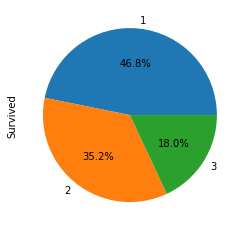

In [117]:
S.plot(kind = 'pie' , autopct = '%.1f%%')

In [119]:
titanic_df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [121]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [123]:
titanic_df.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

## 2. 데이터 전처리 (누락 데이터 처리, 범주화 등)

#### 2.1 Cabin 열 : 전체 삭제하기

In [69]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
titanic_df.drop('Cabin', axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### 2.2  Embarked 열 : 누락데이터를 승선도시 최고 빈도수 값으로 대체하기

In [73]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
titanic_df['Embarked'].fillna({'NaN':'S'})

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [124]:
# ---------------------------------------------------------------
titanic_df['Embarked'].isnull().sum()

2

In [129]:
sr = titanic_df['Embarked'].value_counts(dropna = False)
sr

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [126]:
# numpy에서 가장 큰 값의 인덱스를 구하는 함수: argmax()
# pandas에서 가장 큰 값의 인덱스를 구하는 함수 idxmax()

In [130]:
most_idx = sr.idxmax()
titanic_df['Embarked'].fillna(most_idx)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#### 2.3  Age 열 : 중간값으로 대체하기

In [76]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
me = titanic_df['Age'].median()
me

28.0

In [136]:
titanic_df['Age'].fillna(me)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### 2.4  Age 열: 범주로 나눠보기

* 0~18세
* 18~25세
* 25~35세
* 35~60세
* 60~80세

In [90]:
Age = titanic_df['Age']
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [91]:
bins = [0, 18, 25, 35, 60, 80]
A = pd.cut(Age, bins, labels = ["0~18세", "18~25세", "25~35세", "35~60세", "60~80세"])
A

0      18~25세
1      35~60세
2      25~35세
3      25~35세
4      25~35세
        ...  
886    25~35세
887    18~25세
888       NaN
889    25~35세
890    25~35세
Name: Age, Length: 891, dtype: category
Categories (5, object): ['0~18세' < '18~25세' < '25~35세' < '35~60세' < '60~80세']

<AxesSubplot:>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


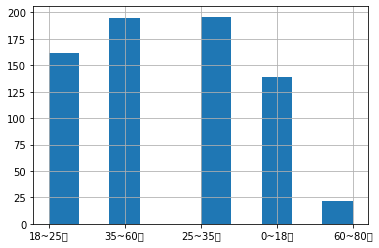

In [137]:
A.hist()

In [139]:
titanic_df['Acat'] = A
titanic_df['Acat']

0      18~25세
1      35~60세
2      25~35세
3      25~35세
4      25~35세
        ...  
886    25~35세
887    18~25세
888       NaN
889    25~35세
890    25~35세
Name: Acat, Length: 891, dtype: category
Categories (5, object): ['0~18세' < '18~25세' < '25~35세' < '35~60세' < '60~80세']

In [141]:
titanic_df['Acat'].value_counts()

25~35세    196
35~60세    195
18~25세    162
0~18세     139
60~80세     22
Name: Acat, dtype: int64

In [143]:
titanic_df.groupby('Acat').mean()['Survived']

Acat
0~18세     0.503597
18~25세    0.333333
25~35세    0.423469
35~60세    0.400000
60~80세    0.227273
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Acat', ylabel='Survived'>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


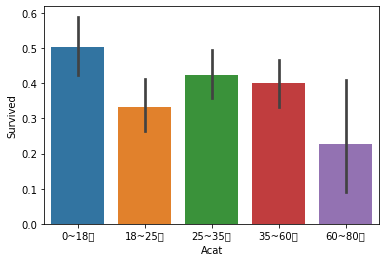

In [145]:
sns.barplot(data = titanic_df, x = 'Acat', y = 'Survived')

<AxesSubplot:xlabel='Acat', ylabel='Fare'>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


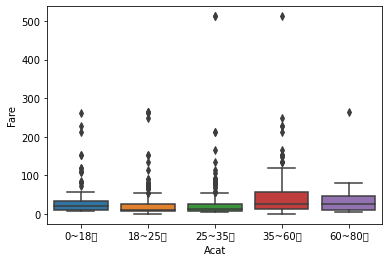

In [148]:
sns.boxplot(data = titanic_df, x = 'Acat', y = 'Fare')

<AxesSubplot:xlabel='Acat', ylabel='Pclass'>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


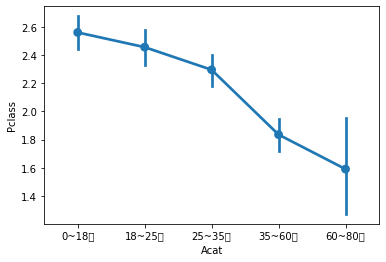

In [150]:
sns.pointplot(data = titanic_df, x = 'Acat', y = 'Pclass')

* 범주 데이터를 dummy 변수로 바꿔보기 (One-Hot Encoding)

In [93]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
dummies = pd.get_dummies(titanic_df['PassengerId'])
dummies

,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
dummies1 = pd.get_dummies(titanic_df['Survived'])
dummies1

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


In [98]:
dummies2 = pd.get_dummies(titanic_df['Pclass'])
dummies2

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [99]:
dummies3 = pd.get_dummies(titanic_df['Age'])
dummies3

,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
dummies4 = pd.get_dummies(titanic_df['SibSp'])
dummies4

,0,1,2,3,4,5,8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,1,0,0,0,0,0
889,1,0,0,0,0,0,0


In [101]:
dummies5 = pd.get_dummies(titanic_df['Parch'])
dummies5

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
889,1,0,0,0,0,0,0


In [102]:
dummies6 = pd.get_dummies(titanic_df['Fare'])
dummies6

,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.5 중복 데이터 확인

In [103]:
titanic_df.duplicated().sum()

0